新規データメッシの過去のイベントの解析

#### 必要なライブラリのインポート

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsbomb as sb

#### 綺麗なグラフを描画するための関数定義

In [2]:
def draw_graph():
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

    # 軸の色の設定
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('grey')
    ax.spines['left'].set_color('darkgrey')
    ax.spines['right'].set_color('none')
    ax.tick_params(axis = 'x', colors ='grey')
    ax.tick_params(axis = 'y', colors = 'darkgrey')
    ax.xaxis.label.set_color('grey')

    return fig, ax

#### ピッチの描画

In [3]:
def draw_pitch(nrows=2):
    period_list = ['1st', '2nd', 'ex1st', 'ex2nd']
    fig, axes = plt.subplots(nrows, 1, figsize=(10, 7*nrows))

    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    for period, ax in zip(period_list, axes):
        ax.set_title(period)
        
        ax.plot([0,120], [0, 0], color='black')
        ax.plot([120,120], [0, 80], color='black')
        ax.plot([120,0], [80,80], color='black')
        ax.plot([0, 0], [80, 0], color='black')
        ax.plot([60, 60], [0, 80], color='black')
        ax.plot([0, 0], [36, 44], color='black', linewidth=10)
        ax.plot([120, 120], [36, 44], color='black', linewidth=10)

#         ax.scatter(60, 40, color='black')
        centreCircle = plt.Circle((60, 40), 12, color="black",fill=False)
        ax.add_patch(centreCircle)

        ax.plot([0, 18],  [18, 18], color='black')
        ax.plot([18, 18],  [18, 62], color='black')
        ax.plot([18, 0],  [62, 62], color='black')
        ax.plot([0, 6],  [30, 30], color='black')
        ax.plot([6, 6],  [30, 50], color='black')
        ax.plot([6, 0],  [50, 50], color='black')
#         ax.scatter(12, 40, color='black')

        ax.plot([120, 102],  [18, 18], color='black')
        ax.plot([102, 102],  [18, 62], color='black')
        ax.plot([102, 120],  [62, 62], color='black')
        ax.plot([120, 114],  [30, 30], color='black')
        ax.plot([114, 114],  [30, 50], color='black')
        ax.plot([114, 120],  [50, 50], color='black')
#         ax.scatter(108, 40, color='black')

    return fig, axes

#### コンペティションの確認

In [4]:
comps = sb.Competitions()
comps.get_dataframe()

,competition_gender,competition_id,competition_name,country_name,match_available,match_updated,season_id,season_name
0,female,37,FA Women's Super League,England,2019-06-23T15:32:29.914,2019-06-23T15:32:29.914,4,2018/2019
1,male,43,FIFA World Cup,International,2019-06-23T12:38:35.142,2019-06-23T12:38:35.142,3,2018
2,male,11,La Liga,Spain,2019-07-29T20:44:30.861,2019-07-29T20:44:30.861,27,2015/2016
3,male,11,La Liga,Spain,2019-07-30T12:42:05.563,2019-07-30T12:42:05.563,26,2014/2015
4,male,11,La Liga,Spain,2019-07-24T19:44:48.866,2019-07-24T19:44:48.866,25,2013/2014
5,male,11,La Liga,Spain,2019-07-29T17:46:18.935,2019-07-29T17:46:18.935,24,2012/2013
6,male,11,La Liga,Spain,2019-08-27T09:48:17.842,2019-08-27T09:48:17.842,23,2011/2012
7,male,11,La Liga,Spain,2019-08-01T17:44:54.870,2019-08-01T17:44:54.870,22,2010/2011
8,male,11,La Liga,Spain,2019-07-11T07:44:14.533,2019-07-11T07:44:14.533,21,2009/2010
9,male,11,La Liga,Spain,2019-07-06T22:42:14.468,2019-07-06T22:42:14.468,41,2008/2009


#### 試合の確認

In [13]:
comps_df = comps.get_dataframe()
competition_id = comps_df[comps_df.competition_name == 'La Liga'].competition_id.unique()[0]

for i, season_id in enumerate(comps_df[comps_df.competition_id == competition_id].season_id.tolist()):
    matches_df_tmp = sb.Matches(event_id=competition_id, season_id=season_id).get_dataframe()
    if i == 0:
        matches_df = matches_df_tmp
    else:
        matches_df = pd.concat([matches_df, matches_df_tmp])

matches_df.reset_index(inplace=True)
matches_df.head()

In [20]:
home_team_name_list, away_team_name_list = [], []
for idx in matches_df.index.values:
    lineups = sb.Lineups(str(matches_df.loc[idx, 'match_id']))
    lineups_df = lineups.get_dataframe()
    home_team_name = lineups_df[lineups_df.team_id == matches_df.loc[idx, 'home_team']].team_name.values[0]
    away_team_name = lineups_df[lineups_df.team_id == matches_df.loc[idx, 'away_team']].team_name.values[0]
    
    home_team_name_list.append(home_team_name); away_team_name_list.append(away_team_name)
    
matches_df['home_team_name'] = home_team_name_list
matches_df['away_team_name'] = away_team_name_list
matches_df.head()

,index,away_score,away_team,competition,competition_stage,home_score,home_team,kick_off,last_updated,match_date,match_id,match_status,match_week,metadata,referee,season,stadium,home_team_name,away_team_name
0,0,8,217,11,"{'id': 1, 'name': 'Regular Season'}",0,219,20:00:00.000,2019-07-24T16:57:09.139,2016-04-20,266310,available,34,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",27,"{'id': 4658, 'name': 'Estadio Abanca-Riazor'}",Deportivo La Coruna,Barcelona
1,1,0,216,11,"{'id': 1, 'name': 'Regular Season'}",6,217,16:00:00.000,2019-07-24T15:24:14.040,2016-03-12,266498,available,29,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 1015, 'name': 'Pedro Pérez'}",27,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Getafe
2,2,1,213,11,"{'id': 1, 'name': 'Regular Season'}",2,217,20:30:00.000,2019-07-22T14:03:27.572,2016-02-28,265839,available,26,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 217, 'name': 'Santiago Jaime', 'country...",27,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Sevilla
3,3,0,214,11,"{'id': 1, 'name': 'Regular Season'}",5,217,17:00:00.000,2019-07-21T23:53:01.973,2016-05-08,265958,available,37,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",27,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Espanyol
4,4,2,217,11,"{'id': 1, 'name': 'Regular Season'}",2,222,16:00:00.000,2019-07-20T09:50:35.712,2016-03-20,266106,available,30,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 220, 'name': 'José Sánchez', 'country':...",27,"{'id': 361, 'name': 'Estadio de la Cerámica', ...",Villarreal,Barcelona


## データの確認

In [ ]:
from tqdm import tqdm
from tqdm._tqdm_notebook import tqdm_notebook 

for i, match_id in tqdm(enumerate(matches_df.match_id)):
    try:
        events = sb.Events(str(match_id))
        event_df_tmp = pd.concat([events.get_dataframe(event_type='shot'), events.get_dataframe(event_type='pass'), events.get_dataframe(event_type='dribble')])
        event_df_tmp['match_id'] = match_id

        if i == 0:
            event_df = event_df_tmp
        else:
            event_df = pd.concat([event_df, event_df_tmp])
    except:
        print(match_id)

In [41]:
event_df.dtypes

angle               float64
assisted_shot_id     object
body_part            object
cross                object
cut_back             object
deflected            object
duration            float64
end_location_x      float64
end_location_y      float64
end_location_z      float64
event_type           object
first_time           object
follows_dribble      object
goal_assist          object
height               object
id                   object
index                 int64
key_pass_id          object
length              float64
minute                int64
miscommunication     object
nutmeg               object
off_camera           object
one_on_one           object
open_goal            object
outcome              object
overrun              object
pass_backheel        object
period                int64
play_pattern         object
player               object
position             object
possession            int64
possession_team      object
recipient            object
redirect            

# 集計

In [91]:
event_df_messi = pd.merge(event_df[event_df.player.str.contains('Messi')], matches_df[['match_id', 'season']], on='match_id')
summary_messi = event_df_messi.groupby(['season', 'event_type']).size()

summary_messi = summary_messi.unstack('event_type')
# summary_messi.columns = ['season_id', 'event_type', 'cnt']

summary_messi = pd.merge(summary_messi, comps.get_dataframe()[['season_id', 'season_name']], left_index=True, right_on='season_id')

summary_messi.drop('season_id', axis=True, inplace=True)
summary_messi.set_index('season_name', inplace=True)
summary_messi.sort_index(inplace=True)

# 可視化

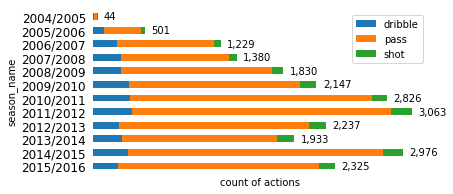

In [129]:
fig, ax = plt.subplots(figsize=(6, 3))
summary_messi.plot.barh(stacked=True, ax=ax)

# 3. y軸の順番を逆に
ax.invert_yaxis()

# 4. 四方の枠(spines)を消す
[spine.set_visible(False) for spine in ax.spines.values()]

# 以下でも可能
# sides = ['left', 'right', 'top', 'bottom']
# [ax.spines[side].set_visible(False) for side in sides] 

# 5. y軸x軸のtickを消す
# 6. x軸のtick label(10000など)を消す
ax.tick_params(bottom=False, left=False, labelbottom=False)

# 7. y軸のラベルサイズを大きく
ax.tick_params(axis='y', labelsize='large')

# 8. バーの右側に実際の値を表示

vmax = summary_messi.sum(axis=1).max()
for i, value in enumerate(summary_messi.sum(axis=1)):
    ax.text(value+vmax*0.02, i, f'{value:,}', va='center')

plt.xlabel('count of actions')

plt.savefig(os.path.join('..', 'fig', 'barh_countOfActions.png'), bbox_inches='tight')

(0, 1)

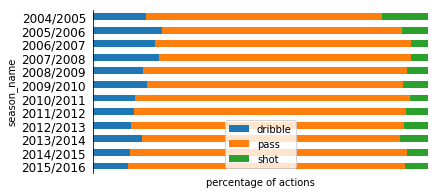

In [128]:
summary_messi_tmp = summary_messi.apply(lambda x: x / x.sum(), axis=1)
summary_messi_tmp.columns = summary_messi.columns

fig, ax = plt.subplots(figsize=(6, 3))
summary_messi_tmp.plot.barh(stacked=True, ax=ax)

# 3. y軸の順番を逆に
ax.invert_yaxis()

# 4. 四方の枠(spines)を消す
# [spine.set_visible(False) for spine in ax.spines.values()]

# 以下でも可能
sides = ['right', 'top', 'bottom']
[ax.spines[side].set_visible(False) for side in sides] 

# 5. y軸x軸のtickを消す
# 6. x軸のtick label(10000など)を消す
ax.tick_params(bottom=False, left=False, labelbottom=False)

# 7. y軸のラベルサイズを大きく
ax.tick_params(axis='y', labelsize='large')

ax.set_xlabel('percentage of actions'); ax.set_xlim([0, 1])